In [109]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [110]:
from preprocessing.preprocess_ucr import UCRDatasetImporter
from preprocessing.preprocess_ucr import UCRDataset
from preprocessing.preprocess_ucr import AugUCRDataset
from preprocessing.data_pipeline import build_data_pipeline
from utils import load_yaml_param_settings
from examine_data import Examiner
import matplotlib.pyplot as plt
import numpy as np

In [111]:
examiner = Examiner()

self.X_train.shape: (8926, 96)
self.X_test.shape: (7711, 96)
# unique labels (train): [0 1 2 3 4 5 6]
# unique labels (test): [0 1 2 3 4 5 6]
self.X_train.shape: (1000, 1024)
self.X_test.shape: (8236, 1024)
# unique labels (train): [0 1 2]
# unique labels (test): [0 1 2]
self.X_train.shape: (1000, 152)
self.X_test.shape: (6164, 152)
# unique labels (train): [0 1]
# unique labels (test): [0 1]
self.X_train.shape: (500, 140)
self.X_test.shape: (4500, 140)
# unique labels (train): [0 1 2 3 4]
# unique labels (test): [0 1 2 3 4]
self.X_train.shape: (1000, 128)
self.X_test.shape: (4000, 128)
# unique labels (train): [0 1 2 3]
# unique labels (test): [0 1 2 3]
self.X_train.shape: (3601, 500)
self.X_test.shape: (1320, 500)
# unique labels (train): [0 1]
# unique labels (test): [0 1]
self.X_train.shape: (896, 945)
self.X_test.shape: (3582, 945)
# unique labels (train): [0 1 2 3 4 5 6 7]
# unique labels (test): [0 1 2 3 4 5 6 7]
self.X_train.shape: (3636, 500)
self.X_test.shape: (810, 500)
# un

In [112]:
examiner.load_models("TwoPatterns")

/Users/johanvikmathisen/Desktop/Fag/Matematikk/Master/Generative-SSL-VQVAE-modelling/saved_models
encoder-TwoPatterns.ckpt
 encoder loaded
/Users/johanvikmathisen/Desktop/Fag/Matematikk/Master/Generative-SSL-VQVAE-modelling/saved_models
decoder-TwoPatterns.ckpt
 decoder loaded
/Users/johanvikmathisen/Desktop/Fag/Matematikk/Master/Generative-SSL-VQVAE-modelling/saved_models
vqmodel-TwoPatterns.ckpt
 vqmodel loaded
maskgit-TwoPatterns.ckpt
maskgit loaded


In [114]:
# for i in range(5):
#     for j in range(8):
#         examiner.PCA_latent(z_tr[:,:,i,j],y_tr)

/Users/johanvikmathisen/Desktop/Fag/Matematikk/Master/Generative-SSL-VQVAE-modelling/saved_models
decorr_encoder-StarLightCurves.ckpt
 encoder loaded
/Users/johanvikmathisen/Desktop/Fag/Matematikk/Master/Generative-SSL-VQVAE-modelling/saved_models
decorr_decoder-StarLightCurves.ckpt
 decoder loaded
/Users/johanvikmathisen/Desktop/Fag/Matematikk/Master/Generative-SSL-VQVAE-modelling/saved_models
decorr_vqmodel-StarLightCurves.ckpt
 vqmodel loaded
decorr_maskgit-StarLightCurves.ckpt
maskgit loaded


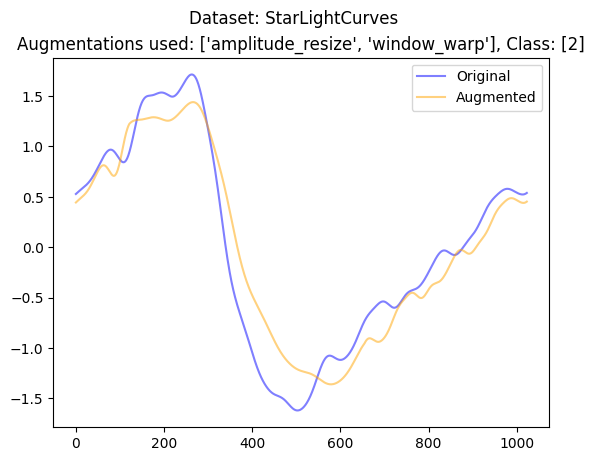

In [191]:

examiner.load_models("StarLightCurves", decorr= True)
examiner.update_config()
config = examiner.get_config()
# time_augs = ['slope']
# timefreq_augs = []
# aug_params = config['augmentations']['aug_params']
use_all_methods = True
augmenter = examiner.load_augmenter(**config["augmentations"])
# augmenter = examiner.load_augmenter(time_augs, time_augs, aug_params, use_all_methods)

x_aug = examiner.augment_samples(n_samples=1)

In [192]:
z_tr, y_tr, z_te, y_te = examiner.get_latents("StarLightCurves")

In [193]:
import torch.nn.functional as F
z_tr_pool = F.adaptive_avg_pool2d(z_tr, (1, 1)).squeeze(-1).squeeze(-1)
z_te_pool = F.adaptive_avg_pool2d(z_te, (1, 1)).squeeze(-1).squeeze(-1)


In [194]:
z_te_pool.shape

torch.Size([8236, 64])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


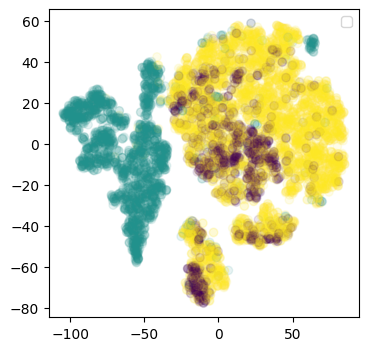

In [195]:
from sklearn.manifold import TSNE
z_tsne = TSNE(
            n_components=2, learning_rate="auto", init="random"
        ).fit_transform(z_te_pool)

plt.figure(figsize=(4, 4))
plt.scatter(z_tsne[:, 0], z_tsne[:, 1], c=y_te, alpha=0.1)
plt.legend()
plt.show()
plt.close()

In [196]:
from examine_data import probes

probe_res = probes(z_tr_pool,z_te_pool, y_tr, y_te)

In [197]:
print(probe_res)

{'knn_accuracy': 0.87178241864983, 'svm_accuracy': 0.9108790675084992}


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


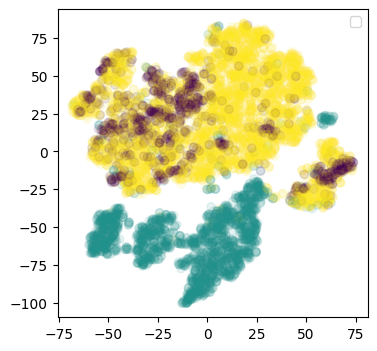

In [199]:
examiner.TSNE_latents(z_te,y_te)

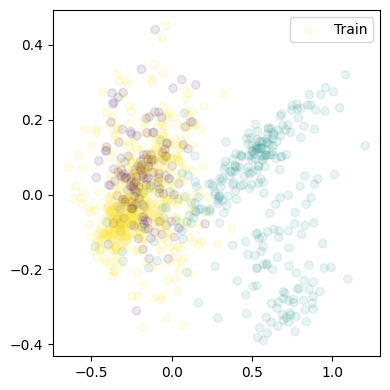

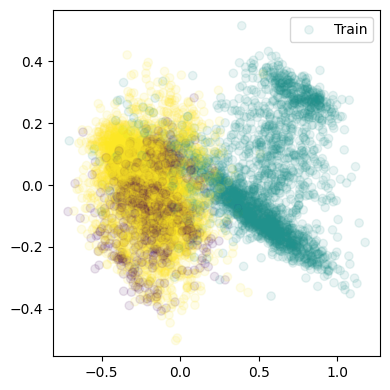

In [201]:
examiner.PCA_latent(z_tr, y_tr)
examiner.PCA_latent(z_te, y_te)
